In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import mean_squared_error, classification_report

In [179]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### Diabeties dataset

In [99]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
df.shape

(100000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
df.duplicated().sum()

3854

In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Информация о колонках с числовыми значениями

In [14]:
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


#### Анализ и преобразование категориальных признаков

In [89]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [90]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [50]:
num_cols = df.select_dtypes(exclude='object')
cat_cols = df.select_dtypes(include='object')

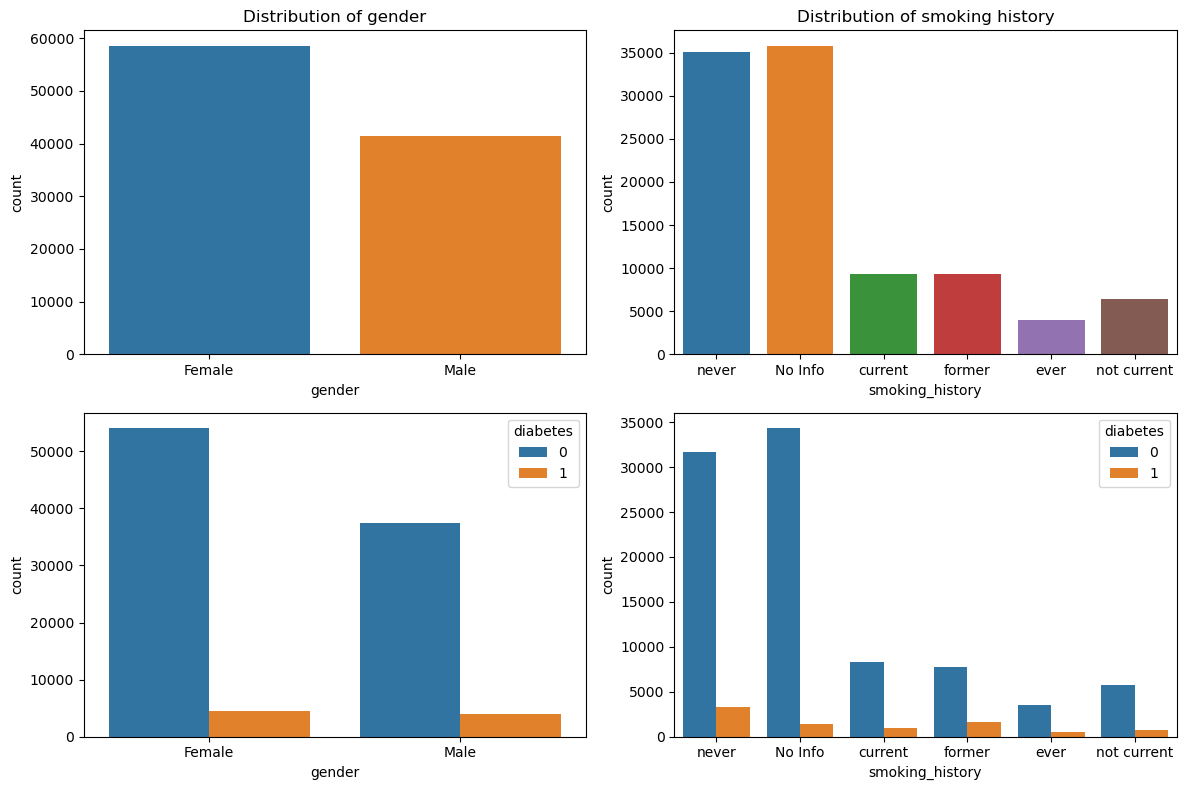

In [171]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
sns.countplot(x = df['gender'], ax = ax[0,0])
sns.countplot(x = df['gender'], hue = df['diabetes'], ax = ax[1,0])
ax[0,0].set_title('Distribution of gender')
sns.countplot(x = df['smoking_history'], ax = ax[0,1])
sns.countplot(x = df['smoking_history'], hue = df['diabetes'], ax = ax[1,1])
ax[0,1].set_title('Distribution of smoking history')
plt.tight_layout()
plt.show()

In [180]:
df = df[df.gender != 'Other']

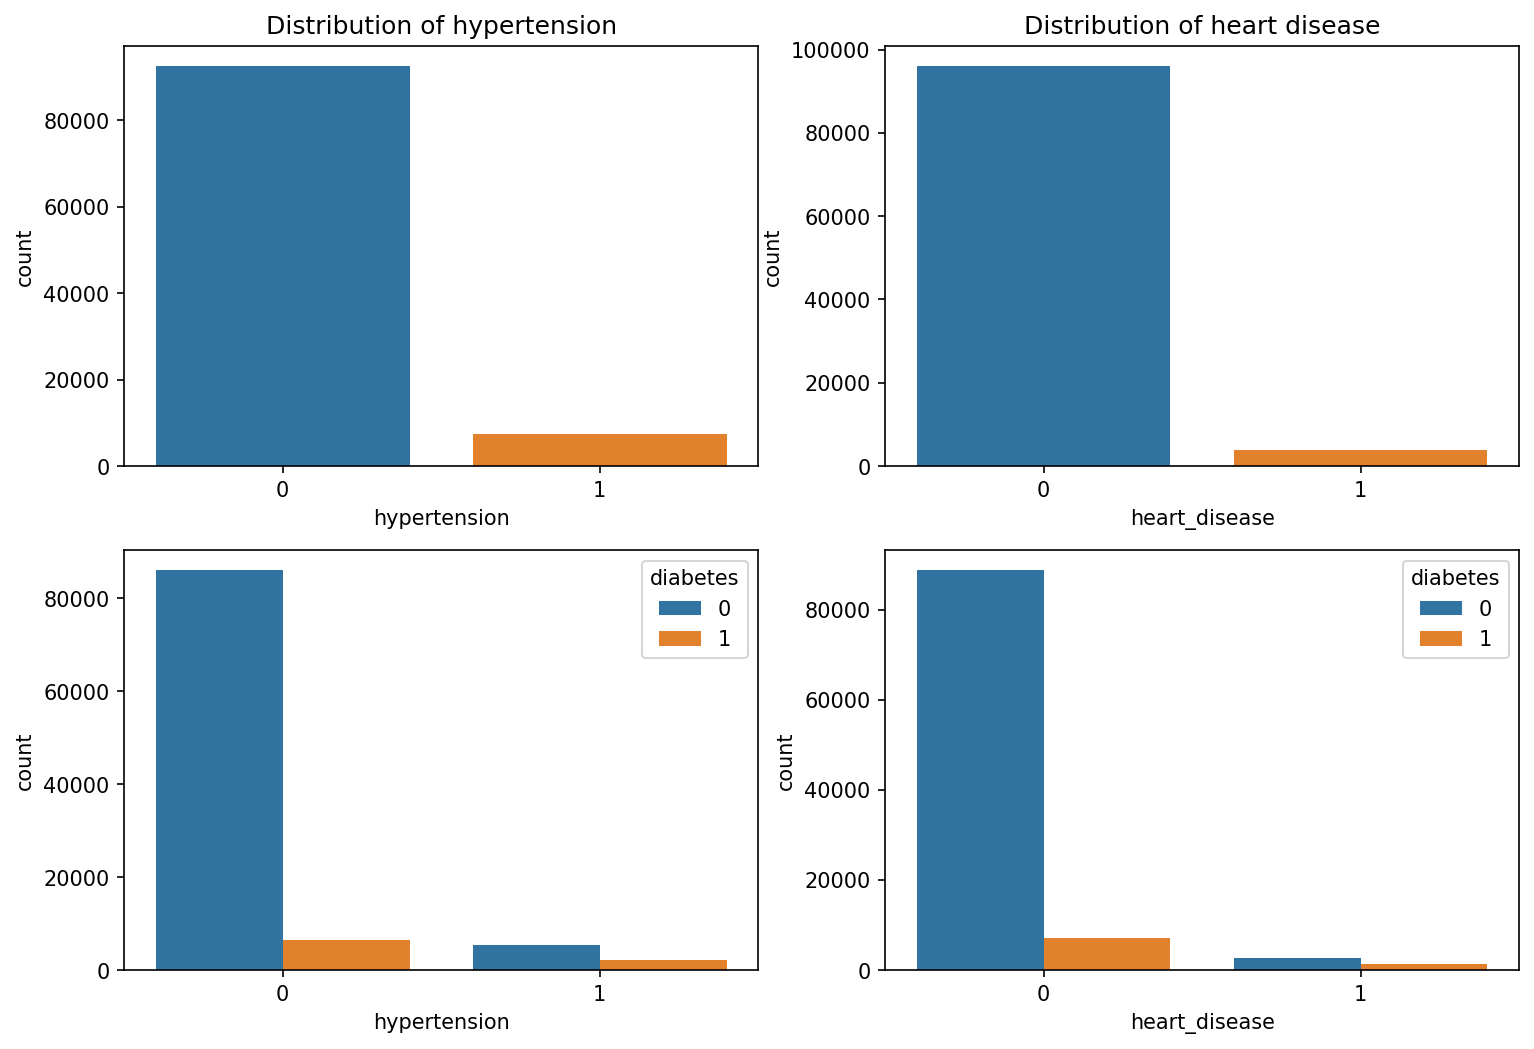

In [170]:
fig, ax = plt.subplots(2, 2, figsize = (12,8), dpi = 150)
sns.countplot(x = df['hypertension'], ax = ax[0,0])
sns.countplot(x = df['hypertension'], hue = df['diabetes'], ax = ax[1,0])
ax[0,0].set_title('Distribution of hypertension')
sns.countplot(x = df['heart_disease'], ax = ax[0,1])
sns.countplot(x = df['heart_disease'], hue = df['diabetes'], ax = ax[1,1])
ax[0,1].set_title('Distribution of heart disease')
plt.show()

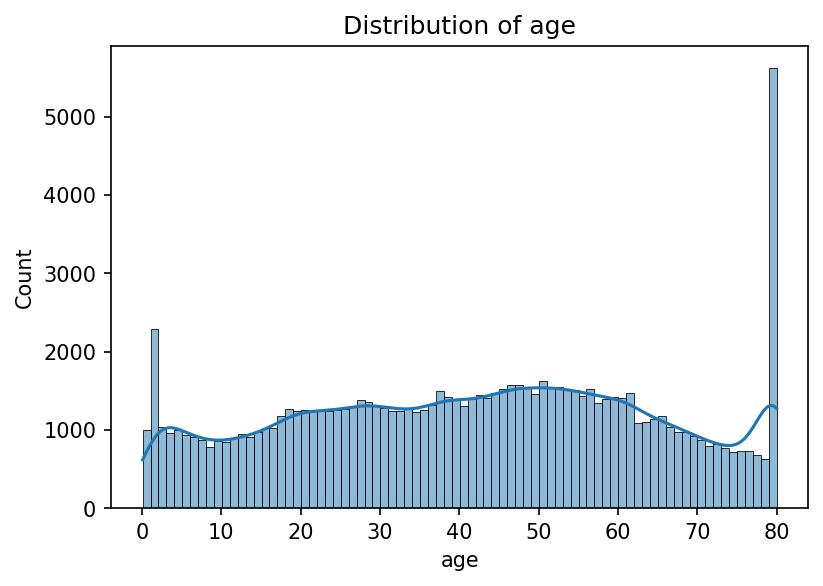

In [120]:
fig = plt.figure(figsize = (6,4), dpi = 150)
sns.histplot(data = df, x ='age', bins = 80, kde = True)
plt.title('Distribution of age')
plt.show()

**Data Card:**

```gender```: пол (Male/Female/Other).  
```age```: возраст.  
```hypertension```: гипертензия - наличие повышенного артериального давления (1 for True, 0 for False).  
```heart_disease```: наличие болезней сердца (1 for True, 0 for False).  
```smoking_history```: анамнез курения (categorical: 'never' - никогда, 'No Info' - нет данных, 'former' - бывший курильщик, 'current' - курит, 'not current' - в настоящее время не курит, 'ever' - когда-либо курил).  
```bmi```: индекс массы тела.  
```HbA1c_level```: HbA1c level, уровень гликированного гемоглобина - контроль за пациентами с диагнозом "сахарный диабет".  
```blood_glucose_level```: уровень глюкозы в крови.  
```diabetes```: наличие диабета (1 for True, 0 for False) - *предсказываем*. 
  
Набор данных имеет 10 000 строк и 9 признаков.   
Нулевых значений не обнаружено.  
В выборке представлено больше всего пациентов пожилого возраста.  
Оставляем дублирующиеся строки (3854), так как результаты пациентов могут совпадать.  
Для бинарных признаков воспользуемся методом One-Hot Encoding, чтобы избежать категоризации.  
Для 'gender' удалим 'Other' в количестве 18-ти строк.  
~35% информации неизвестно у признака 'курение'.

#### Сравнительный анализ

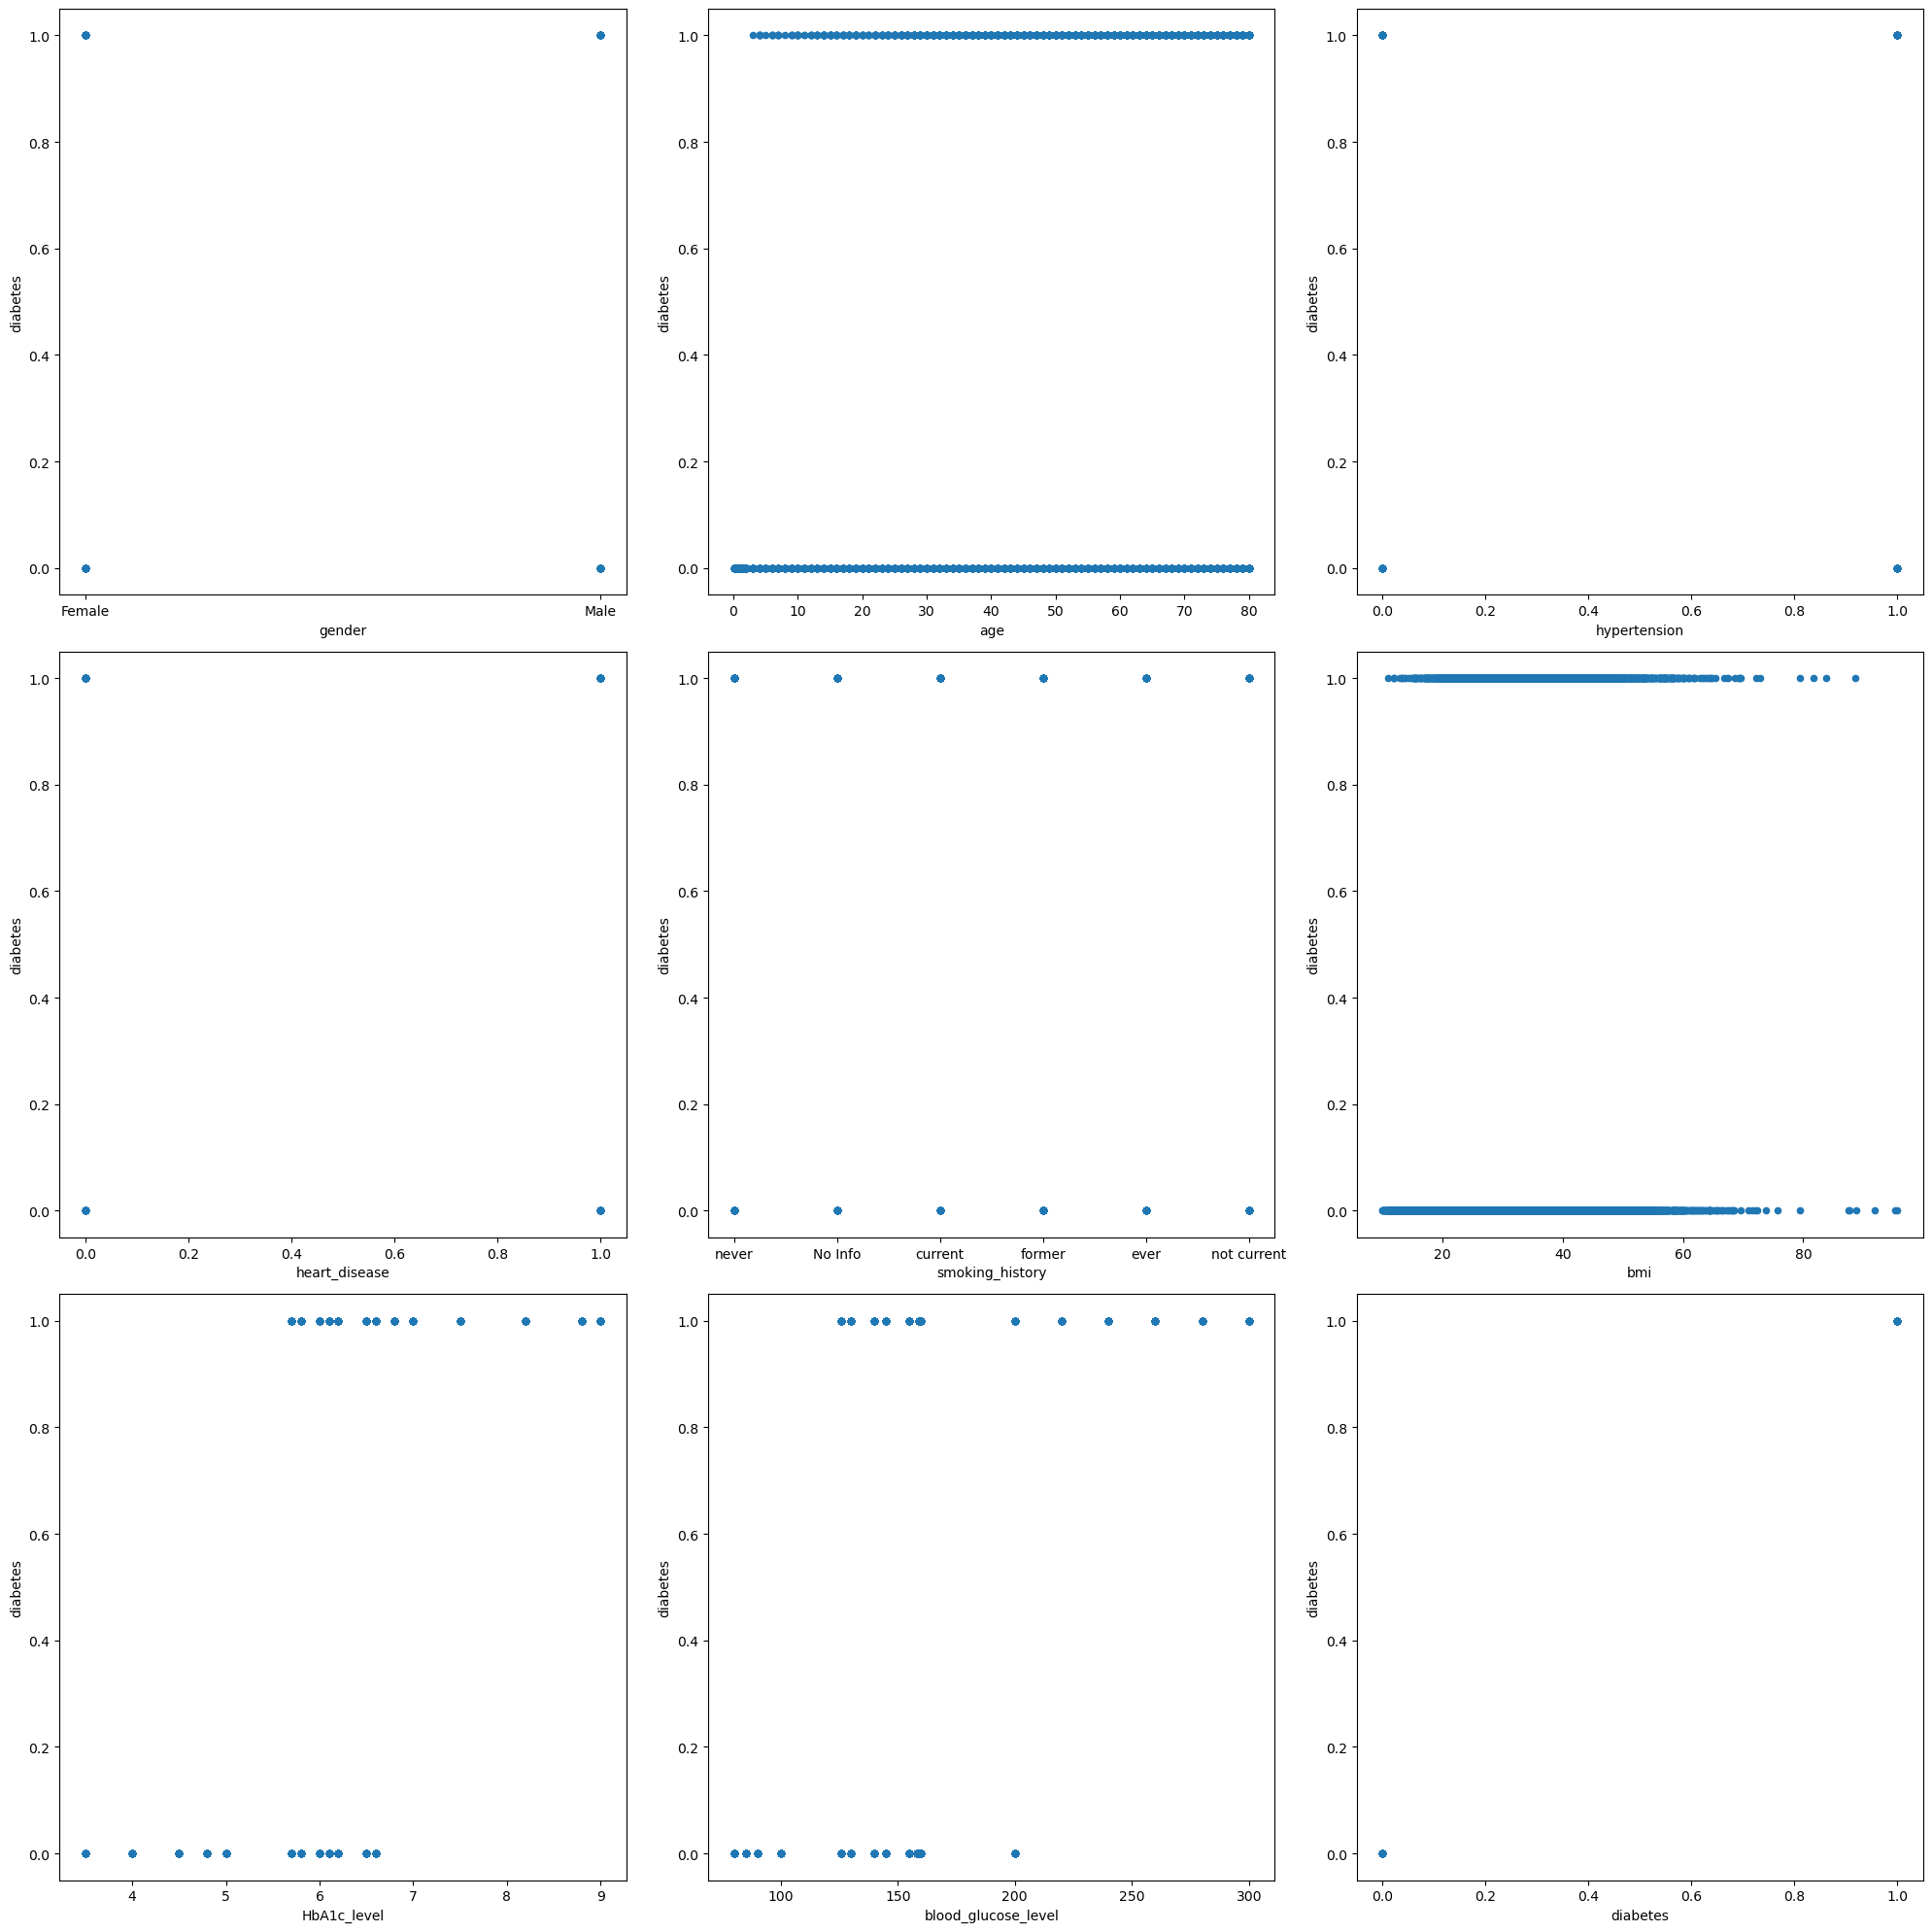

In [132]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "diabetes", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])
plt.tight_layout()

**[0,2] diabeties(HbA1c_level):** повышенный уровень гликированного гемоглобина наблюдается у пациентов с диагностированным диабетом.  
**[1,2] diabeties(blood_glucose_level):** уровень глюкозы в крови выше у пациентов с диагностированным диабетом.

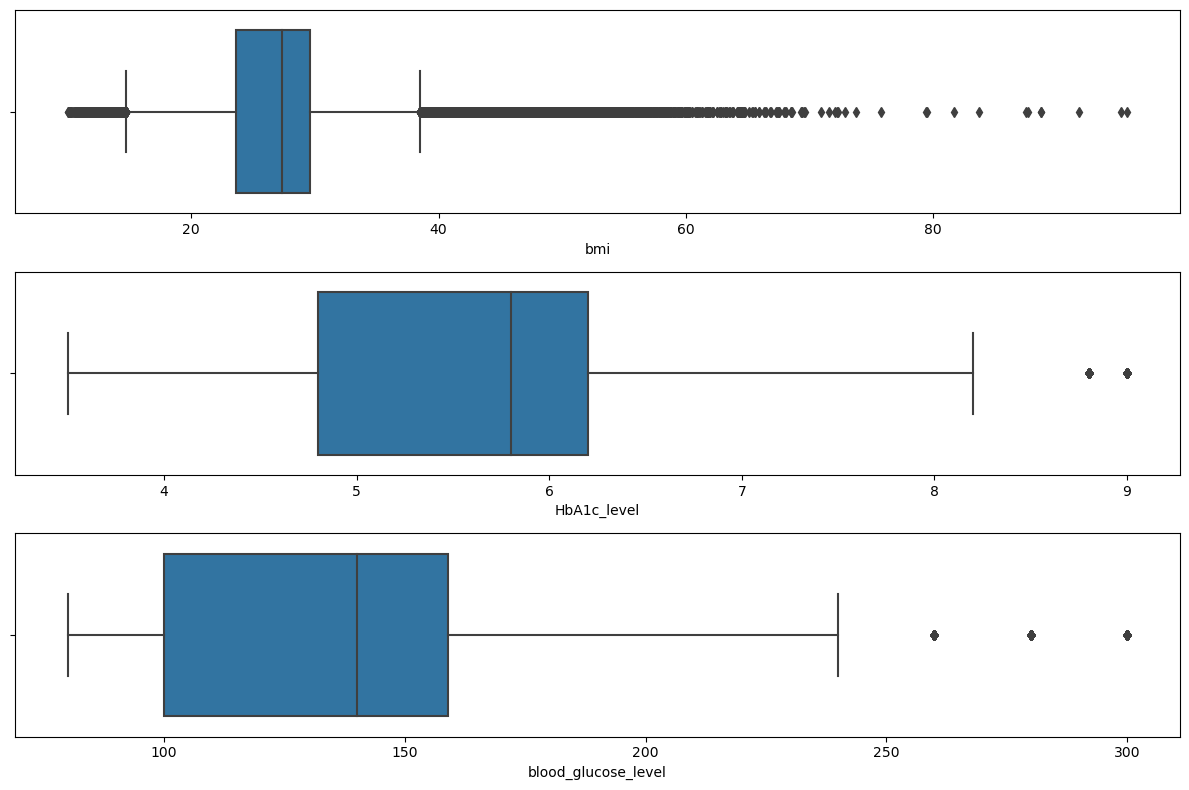

In [145]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
sns.boxplot(x=df['bmi'], ax=axes[0])
sns.boxplot(x=df['HbA1c_level'], ax=axes[1])
sns.boxplot(x=df['blood_glucose_level'], ax=axes[2])
plt.tight_layout()
plt.show()

In [181]:
df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=True)

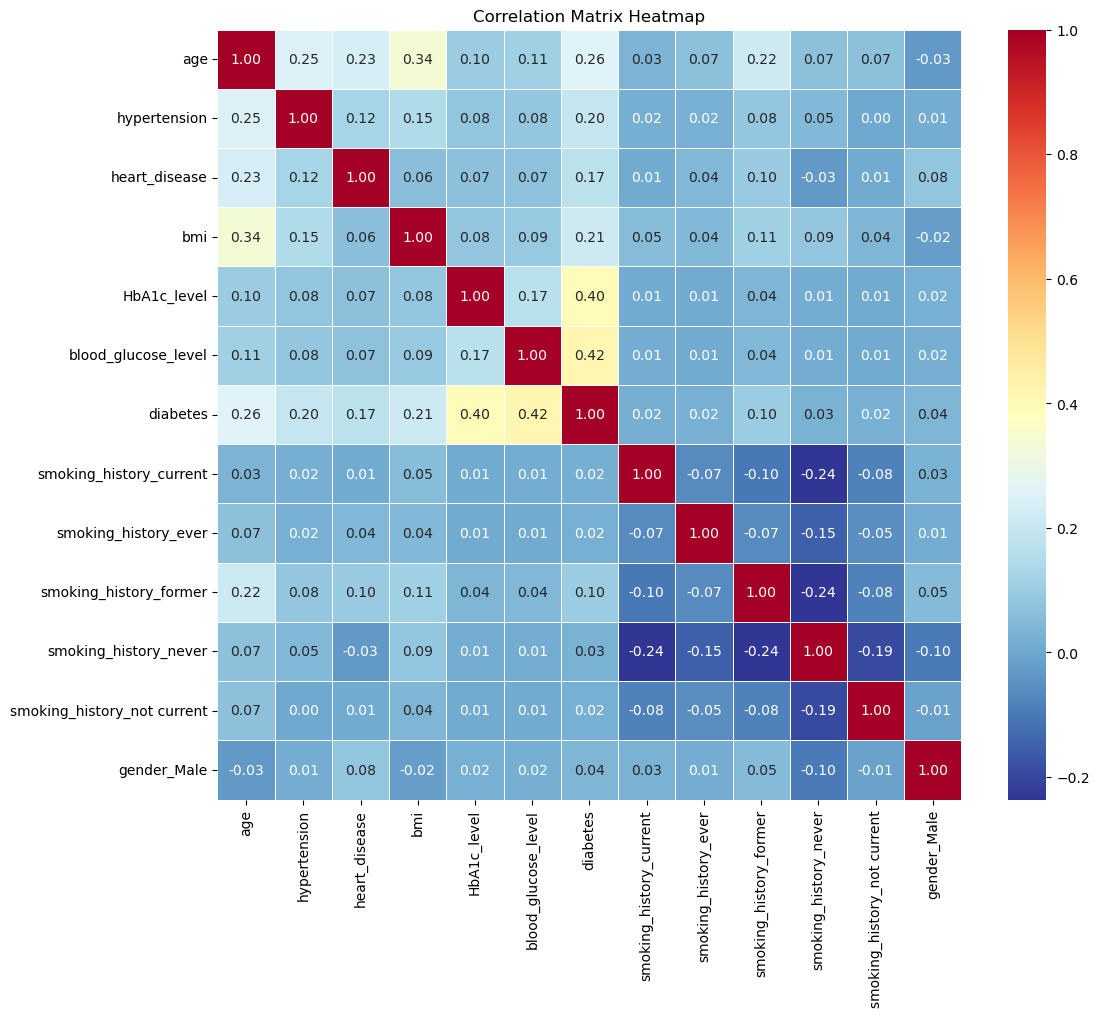

In [104]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu_r", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Выявлены позитивные корреляции наличия диабета с индексом массы тела(0.34), уровнем гликированного гемоглобина(0.4), уровнем глюкозы в крови(0.42).  
~0.4 - небольшая значимость, следовательно, можем строить бейзлайновую модель без удаления коррелирующих признаков.

### Baseline

Предсказание наличия или отсутсвия диабета - задача классификации, поэтому, были выбраны метрики: accuracy, precision-recall, F1-мера, F-beta мера и AUC ROC.

In [212]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df = df[df.gender != 'Other']
df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=True)

In [213]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024, test_size=0.25) 

In [214]:
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train, y_train);

In [218]:
y_pred_dummy = dummy_clf.predict(X_test) 
print(f'Наиболее частотный класс для классификации: {accuracy_score(y_test, y_pred_dummy)}')

Наиболее частотный класс для классификации: 0.9123859817570812


In [216]:
confusion_matrix(y_test, y_pred_dummy)

array([[22806,     0],
       [ 2190,     0]], dtype=int64)

Получается, наиболее частотный класс - ноль.

In [219]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')

Precision for Dummy Classificator: 0.0
Recall for Dummy Classificator: 0.0
F1-score for Dummy Classificator: 0.0
F1-score for Dummy Classificator (recall bias): 0.0
Fbeta-score for Dummy Classificator (precision bias): 0.0


Для дальнейшего измерения качества с помощью выбранной метрики (и чтобы она не была нулевой) воспользуемся другой моделью - логистической регрессией.

In [220]:
y_pred_log_reg = log_reg.predict(X_test) 
accuracy_score(y_test, y_pred_log_reg)

0.960433669387102

In [221]:
confusion_matrix(y_test, y_pred_log_reg)

array([[22610,   196],
       [  793,  1397]], dtype=int64)

In [225]:
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

Precision for Logistic regression: 0.8769617074701821
Recall for Logistic regression: 0.6378995433789955
F1-score for Logistic regression: 0.7385672746497488
F1-score for Logistic regression (recall bias): 0.6746836665700763
Fbeta-score for Logistic regression (precision bias): 0.8158140621350152


In [233]:
def plot_roc_auc(fpr, tpr, thresholds, title):
    roc_auc = auc(fpr,tpr) 
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

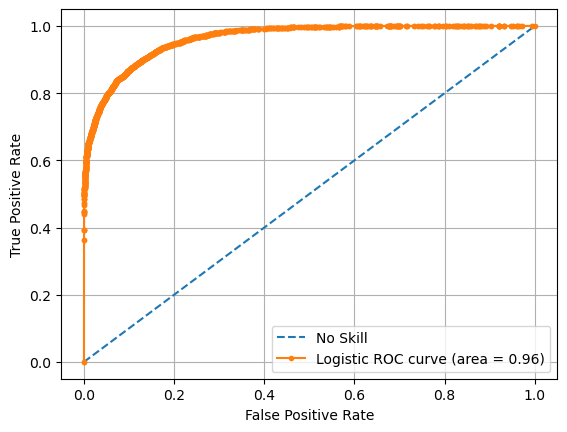

In [234]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

Диапазоны значений переменных и единицы измерения сильно различаются, поэтому воспользуемся методом StandartScaler.

In [235]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns
)

In [238]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_preds_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22806
           1       0.88      0.64      0.74      2190

    accuracy                           0.96     24996
   macro avg       0.92      0.82      0.86     24996
weighted avg       0.96      0.96      0.96     24996



После масштабирования метрики улучшились

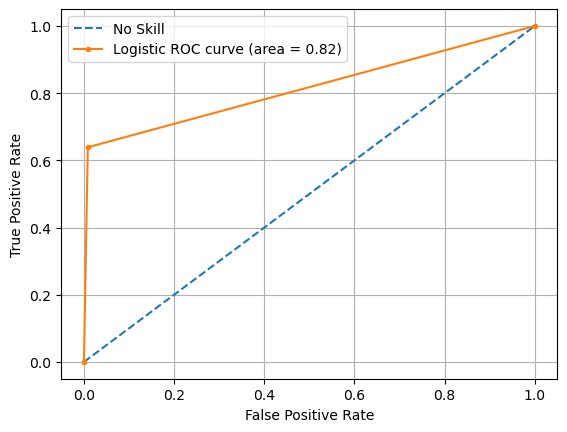

In [240]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_preds_logreg)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

Но не все (видимо, при масштабировании часть информации, на которую опиралась именно эта метрика, была утеряна).  
Насколько это плохо?